# Estadística aplicada

Sesión 7 - 7 septiembre

Cecilia Sarahí Gutiérrez Padilla 1953437 Gpo43

In [1]:
## librerias basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pip install lifelines

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
## librerias especializadas
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import LogNormalFitter

In [4]:
## importar los datos 
recaida = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/ejercicio_expo.csv')

In [5]:
recaida

,Paciente,tiempo,estado
0,1,5,1
1,2,8,1
2,3,12,1
3,4,24,1
4,5,32,1
5,6,17,1
6,7,16,0
7,8,17,0
8,9,19,0
9,10,30,0


In [6]:
# estimar el modelo exponencial
#expon = ExponentialFitter().fit(tiempo superv, evento/censura)
expon = ExponentialFitter().fit(recaida[' tiempo'], recaida[' estado'])

In [7]:
## a) riesgo
expon.hazard_

,Exponential_estimate
5.0,0.033333
8.0,0.033333
11.0,0.033333
14.0,0.033333
17.0,0.033333
20.0,0.033333
23.0,0.033333
26.0,0.033333
29.0,0.033333
32.0,0.033333


In [8]:
## supervivencia t=16
expon.survival_function_at_times(16)

16    0.586646
Name: Exponential_estimate, dtype: float64

In [9]:
## acceder función supervivencia (todos los valores)
expon.survival_function_

,Exponential_estimate
5.0,0.846482
8.0,0.765928
11.0,0.693041
14.0,0.627089
17.0,0.567414
20.0,0.513417
23.0,0.464559
26.0,0.420350
29.0,0.380349
32.0,0.344154


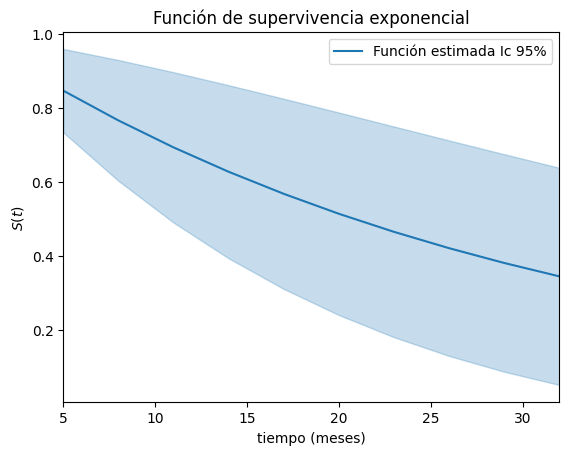

In [10]:
# grafica S(t)
expon.plot_survival_function(label='Función estimada Ic 95%')
plt.title('Función de supervivencia exponencial')
plt.xlim(5,32)
plt.xlabel('tiempo (meses)')
plt.ylabel('$S(t)$')
plt.show()

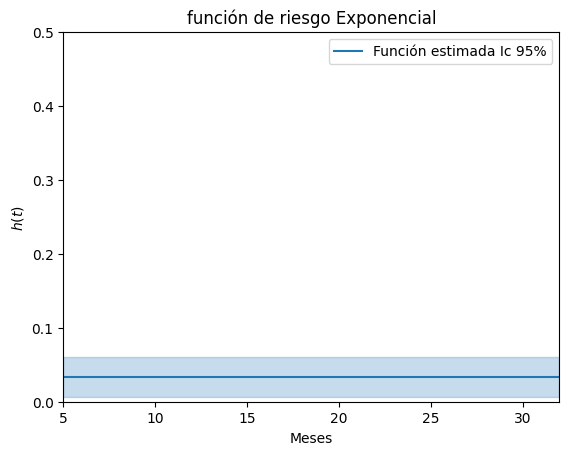

In [11]:
#grafica h(t)
expon.plot_hazard(label='Función estimada Ic 95%')
plt.title('función de riesgo Exponencial')
plt.xlim(5,32)
plt.ylim(0,0.5)
plt.xlabel('Meses')
plt.ylabel('$h(t)$')
plt.show()

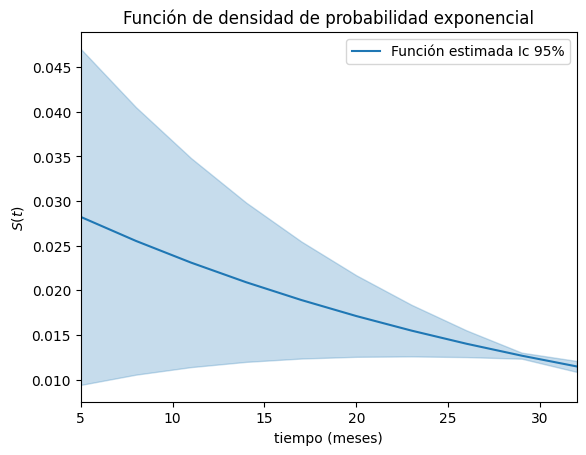

In [12]:
#grafica f(t)
expon.plot_density(label='Función estimada Ic 95%')
plt.title('Función de densidad de probabilidad exponencial')
plt.xlim(5,32)
plt.xlabel('tiempo (meses)')
plt.ylabel('$S(t)$')
plt.show()

**Weibull**

Vamos a suponer que el tiempo de recaida se distribuye Weibull

In [13]:
#modelo weibull
mweibull = WeibullFitter().fit(recaida[' tiempo'], recaida[' estado'])

In [14]:
## valor de gamma
mweibull.rho_.round(2)

1.89

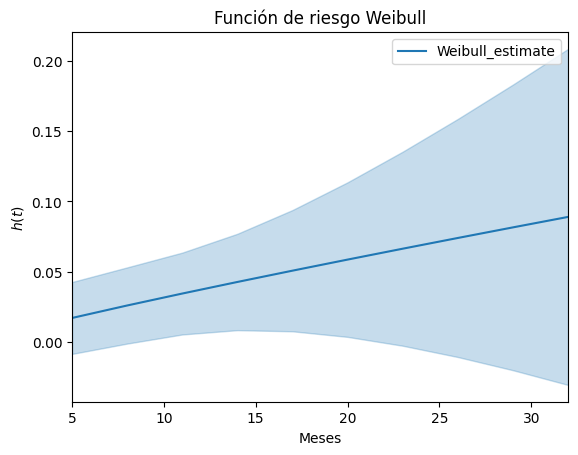

In [15]:
mweibull.plot_hazard()
plt.title('Función de riesgo Weibull')
plt.xlim(5,32)
plt.xlabel('Meses')
plt.ylabel('$h(t)$')
plt.show()

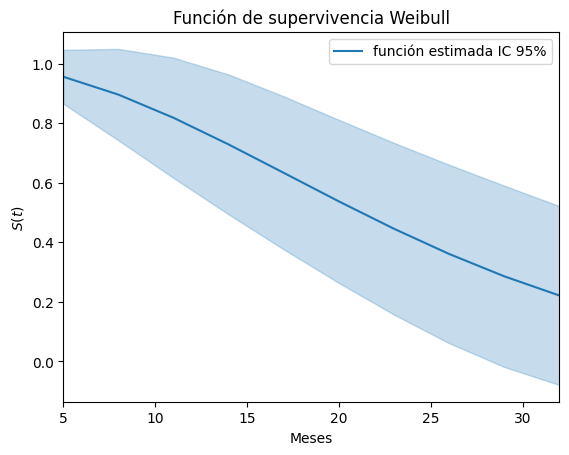

In [16]:
##
mweibull.plot_survival_function(label='función estimada IC 95%')
plt.title('Función de supervivencia Weibull')
plt.xlim(5,32)
plt.xlabel('Meses')
plt.ylabel('$S(t)$')
plt.show()

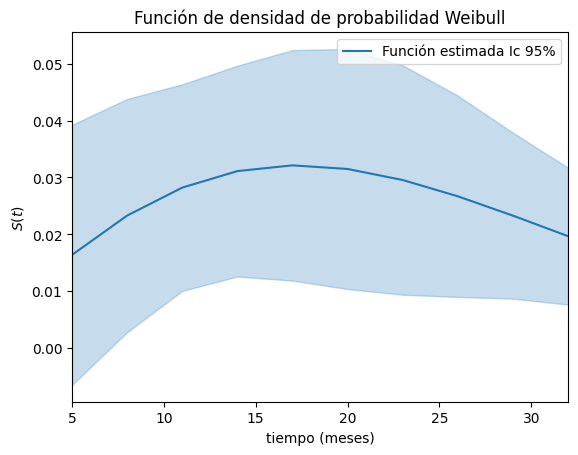

In [17]:
mweibull.plot_density(label='Función estimada Ic 95%')
plt.title('Función de densidad de probabilidad Weibull')
plt.xlim(5,32)
plt.xlabel('tiempo (meses)')
plt.ylabel('$S(t)$')
plt.show()

**LogNormal**

Vamos a suponer que el tiempo de recaída se disribuye lognormal

In [18]:
mlogn= LogNormalFitter().fit(recaida[' tiempo'], recaida[' estado'])

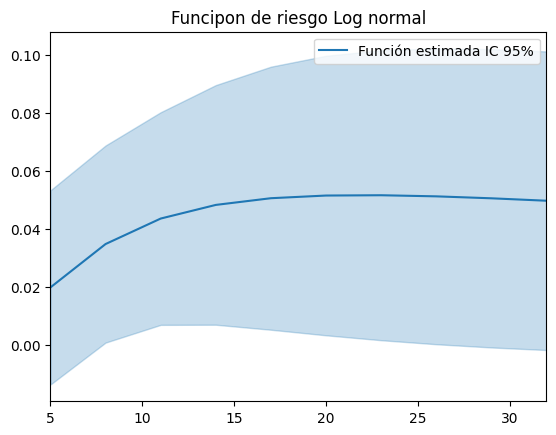

In [22]:
##grafica función de riesgo
mlogn.plot_hazard(label='Función estimada IC 95%')
plt.title('Funcipon de riesgo Log normal')
plt.xlim(5,32)
plt.show()

In [21]:
mlogn.hazard_

,LogNormal_estimate
5.0,0.019961
8.0,0.034916
11.0,0.043704
14.0,0.048408
17.0,0.050720
20.0,0.051641
23.0,0.051744
26.0,0.051361
29.0,0.050690
32.0,0.049850


el riesgo es creciente del tiempo 5 al 23, y es decreciente del tiempo 23 al 32

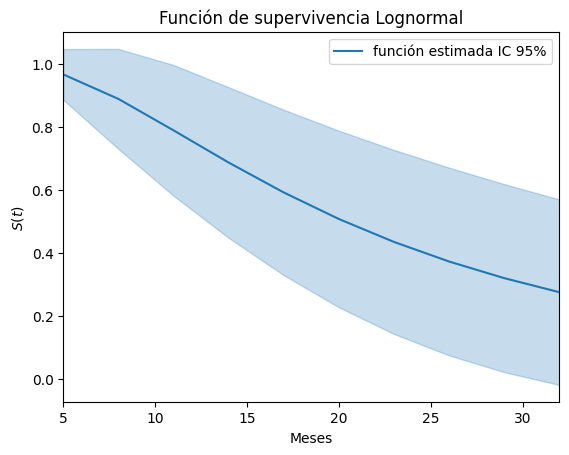

In [25]:
mlogn.plot_survival_function(label='función estimada IC 95%')
plt.title('Función de supervivencia Lognormal')
plt.xlim(5,32)
plt.xlabel('Meses')
plt.ylabel('$S(t)$')
plt.show()

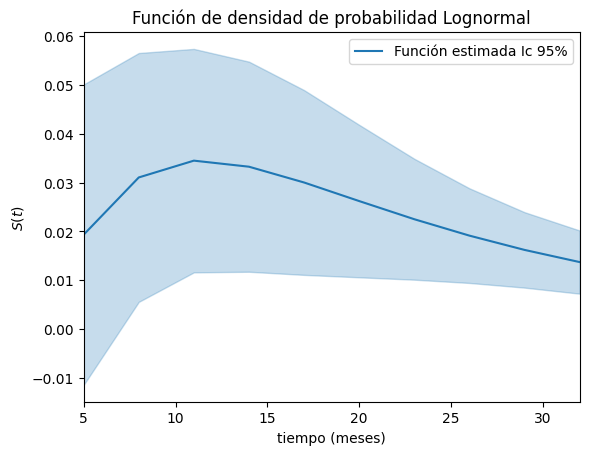

In [26]:
mlogn.plot_density(label='Función estimada Ic 95%')
plt.title('Función de densidad de probabilidad Lognormal')
plt.xlim(5,32)
plt.xlabel('tiempo (meses)')
plt.ylabel('$S(t)$')
plt.show()

Cual de los tres modelos se ajusta mejor (describe) a los datos:
1. Exponencial
2. Weibull
3. LogNormal

Criterio Akaike(AIC) = $-2ln(fn Verosimilitud) + 2k$

k= parámetros del modelo 

De acuerdo con el AIC el "mejor" modelo es el que tiene el menor valor de AIC. De acuerdo con el criterio de AIC son "mejores" los modelos más simples

In [30]:
print('Exponencial: ', expon.AIC_.round(2),', Weibull: ', mweibull.AIC_.round(2),', LogNormal: ', mlogn.AIC_.round(2))

Exponencial:  54.81 , Weibull:  54.16 , LogNormal:  54.51


De acuerdo con AIC el mejor modelo es el Weibull. Lo que significa que el riesgo de recaída es creciente.